## Analyzing climate data stored in NetCDF format to understand climate patterns and changes.

### To enable visualization display, click "Trust Notebook."

In [3]:
#GENERAL

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
import random
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from folium import plugins
from netCDF4 import Dataset
import cartopy.crs as ccrs
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy import signal
from scipy.fft import fftshift
from mpl_toolkits.basemap import Basemap

from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=RuntimeWarning)

In [2]:
!pip install basemap
!pip install basemap-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.6/864.6 kB 19.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.3 MB/s eta 0:00:0000:0100:01


In [7]:
NETCDF_PATH = "/kaggle/input/earthdata-merra2-co/MERRA2_400.tavgM_2d_chm_Nx.201901.nc4"

In [8]:
NETCDF_DATA = Dataset(NETCDF_PATH,more="r")

In [9]:
print(repr(NETCDF_DATA))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Contact: http://gmao.gsfc.nasa.gov
    History: Original file generated: Mon Feb 11 23:51:43 2019 GMT
    Filename: MERRA2_400.tavgM_2d_chm_Nx.201901.nc4
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_chm_Nx.monthly.201901.nc4
    Source: CVS tag: GEOSadas-5_12_4_p15_M2-OPS experiment_id: d5124_m2_jan10
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXCHM
    RangeBeginningDate: 2019-01-01
    RangeEndingDate: 2019-01-31
    GranuleID: MERRA2_400.tavgM_2d_chm_Nx.201901.nc4
    ProductionDateTime: Original file generated: Mon Feb 11 23:51:43 2019 GMT
    LongName: MERRA2 tavg1_2d_chm_Nx: 2d,3-Hourly,Time-Averaged,S

In [10]:
DATA_LONG = NETCDF_DATA.variables["lon"][:]
DATA_LAT = NETCDF_DATA.variables["lat"][:]
DATA_TIME = NETCDF_DATA.variables["time"][:]

DATA_COCL = NETCDF_DATA.variables["COCL"][0,:,:]
DATA_COEM = NETCDF_DATA.variables["COEM"][0,:,:]
DATA_COLS = NETCDF_DATA.variables["COLS"][0,:,:]
DATA_TO3 = NETCDF_DATA.variables["TO3"][0,:,:]

In [11]:
print(type(DATA_LONG))
print(type(DATA_LAT))
print(type(DATA_TIME))
print(type(DATA_COCL))
print(type(DATA_COEM))
print(type(DATA_COLS))
print(type(DATA_TO3))

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>


In [12]:
NETCDF_DATA.variables["time"]

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: minutes since 2019-01-01 00:30:00
    time_increment: 60000
    begin_date: 20190101
    begin_time: 3000
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of -2147483647 used

In [13]:
COCL_LAT = DATA_COCL[:,0].data
COCL_LONG = DATA_COCL[0,:].data

COEM_LAT = DATA_COEM[:,0].data
COEM_LONG = DATA_COEM[0,:].data

COLS_LAT = DATA_COLS[:,0].data
COLS_LONG = DATA_COLS[0,:].data

TO3_LAT = DATA_TO3[:,0].data
TO3_LONG = DATA_TO3[0,:].data

In [14]:
COCL_LAT_SERIES = pd.Series(COCL_LAT,name="COCL_LAT").astype(float)
COCL_LONG_SERIES = pd.Series(COCL_LONG,name="COCL_LONG").astype(float)

COEM_LAT_SERIES = pd.Series(COEM_LAT,name="COEM_LAT").astype(float)
COEM_LONG_SERIES = pd.Series(COEM_LONG,name="COEM_LONG").astype(float)

COLS_LAT_SERIES = pd.Series(COLS_LAT,name="COLS_LAT").astype(float)
COLS_LONG_SERIES = pd.Series(COLS_LONG,name="COLS_LONG").astype(float)

TO3_LAT_SERIES = pd.Series(COCL_LAT,name="TO3_LAT").astype(float)
TO3_LONG_SERIES = pd.Series(COCL_LAT,name="TO3_LONG").astype(float)

In [15]:
COCL_COOR_DATA = pd.concat([COCL_LAT_SERIES,COCL_LONG_SERIES],axis=1)
COEM_COOR_DATA = pd.concat([COEM_LAT_SERIES,COEM_LONG_SERIES],axis=1)
COLS_COOR_DATA = pd.concat([COLS_LAT_SERIES,COLS_LONG_SERIES],axis=1)
TO3_COOR_DATA = pd.concat([TO3_LAT_SERIES,TO3_LONG_SERIES],axis=1)

In [16]:
COCL_COOR_DATA.dropna(inplace=True,axis=0)
COEM_COOR_DATA.dropna(inplace=True,axis=0)
COLS_COOR_DATA.dropna(inplace=True,axis=0)
TO3_COOR_DATA.dropna(inplace=True,axis=0)

In [17]:
DATA_LAT_SERIES = pd.Series(DATA_LAT.data,name="LATITUDE")
DATA_LONG_SERIES = pd.Series(DATA_LONG,name="LONGITUDE")

In [18]:
MAIN_DATA = pd.concat([DATA_LAT_SERIES,DATA_LONG_SERIES,COCL_LAT_SERIES,COCL_LONG_SERIES,
                      COEM_LAT_SERIES,COEM_LONG_SERIES,COLS_LAT_SERIES,COLS_LONG_SERIES,
                      TO3_LAT_SERIES,TO3_LONG_SERIES],axis=1)

In [19]:
MAIN_DATA.dropna(inplace=True,axis=0)

In [20]:
MAIN_DATA["COCL_SUM"] = MAIN_DATA["COCL_LAT"] + MAIN_DATA["COCL_LONG"]
MAIN_DATA["COEM_SUM"] = MAIN_DATA["COEM_LAT"] + MAIN_DATA["COEM_LONG"]
MAIN_DATA["COLS_SUM"] = MAIN_DATA["COLS_LAT"] + MAIN_DATA["COLS_LONG"]
MAIN_DATA["TO3_SUM"] = MAIN_DATA["TO3_LAT"] + MAIN_DATA["TO3_LONG"]

In [21]:
MAIN_DATA

,LATITUDE,LONGITUDE,COCL_LAT,COCL_LONG,COEM_LAT,COEM_LONG,COLS_LAT,COLS_LONG,TO3_LAT,TO3_LONG,COCL_SUM,COEM_SUM,COLS_SUM,TO3_SUM
0,-90.0,-180.000,0.000173,0.000173,4.593709e-13,4.593709e-13,2.844522e-11,2.844522e-11,0.000173,0.000173,0.000347,9.187418e-13,5.689044e-11,0.000347
1,-89.5,-179.375,0.000171,0.000173,4.933330e-13,4.593709e-13,2.801846e-11,2.844522e-11,0.000171,0.000171,0.000345,9.527038e-13,5.646368e-11,0.000343
2,-89.0,-178.750,0.000168,0.000173,4.703155e-13,4.593709e-13,2.722781e-11,2.844522e-11,0.000168,0.000168,0.000341,9.296864e-13,5.567303e-11,0.000335
3,-88.5,-178.125,0.000164,0.000173,3.882951e-13,4.593709e-13,2.643465e-11,2.844522e-11,0.000164,0.000164,0.000338,8.476660e-13,5.487987e-11,0.000329
4,-88.0,-177.500,0.000164,0.000173,7.649723e-13,4.593709e-13,2.633010e-11,2.844522e-11,0.000164,0.000164,0.000337,1.224343e-12,5.477532e-11,0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,88.0,42.500,0.000622,0.000174,0.000000e+00,0.000000e+00,9.672174e-14,2.859641e-11,0.000622,0.000622,0.000795,0.000000e+00,2.869313e-11,0.001243
357,88.5,43.125,0.000620,0.000174,0.000000e+00,0.000000e+00,9.640005e-14,2.859641e-11,0.000620,0.000620,0.000794,0.000000e+00,2.869281e-11,0.001240
358,89.0,43.750,0.000619,0.000174,0.000000e+00,0.000000e+00,9.842016e-14,2.859641e-11,0.000619,0.000619,0.000793,0.000000e+00,2.869483e-11,0.001238
359,89.5,44.375,0.000618,0.000174,3.492215e-16,0.000000e+00,1.000129e-13,2.859641e-11,0.000618,0.000618,0.000792,3.492215e-16,2.869642e-11,0.001236


In [22]:
MAIN_DATA[["COCL_SUM","COEM_SUM","COLS_SUM","TO3_SUM"]].describe().T

,count,mean,std,min,25%,50%,75%,max
COCL_SUM,361.0,6.604920e-04,1.309320e-04,3.374487e-04,5.826976e-04,6.789017e-04,7.846044e-04,8.077242e-04
COEM_SUM,361.0,4.689482e-13,8.602313e-13,0.000000e+00,2.031505e-13,3.983301e-13,4.804001e-13,9.144789e-12
COLS_SUM,361.0,1.006381e-10,5.507144e-11,2.868195e-11,4.790872e-11,9.249647e-11,1.498395e-10,1.895166e-10
TO3_SUM,361.0,9.718173e-04,2.607575e-04,3.281900e-04,8.186878e-04,1.005468e-03,1.220267e-03,1.267866e-03


In [23]:
# IF IT IS NECESSARY

COCL_LAT_LONG = COCL_COOR_DATA[["COCL_LAT","COCL_LONG"]]
COEM_LAT_LONG = COEM_COOR_DATA[["COEM_LAT","COEM_LONG"]]
COLS_LAT_LONG = COLS_COOR_DATA[["COLS_LAT","COLS_LONG"]]
TO3_LAT_LONG = TO3_COOR_DATA[["TO3_LAT","TO3_LONG"]]

COCL_LAT_LONG.COCL_LAT = COCL_LAT_LONG.COCL_LAT.astype(float)
COCL_LAT_LONG.COCL_LONG = COCL_LAT_LONG.COCL_LONG.astype(float)

COEM_LAT_LONG.COEM_LAT = COEM_LAT_LONG.COEM_LAT.astype(float)
COEM_LAT_LONG.COEM_LONG = COEM_LAT_LONG.COEM_LONG.astype(float)

COLS_LAT_LONG.COLS_LAT = COLS_LAT_LONG.COLS_LAT.astype(float)
COLS_LAT_LONG.COLS_LONG = COLS_LAT_LONG.COLS_LONG.astype(float)

TO3_LAT_LONG.TO3_LAT = TO3_LAT_LONG.TO3_LAT.astype(float)
TO3_LAT_LONG.TO3_LONG = TO3_LAT_LONG.TO3_LONG.astype(float)

In [24]:
plt.style.use("dark_background")

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


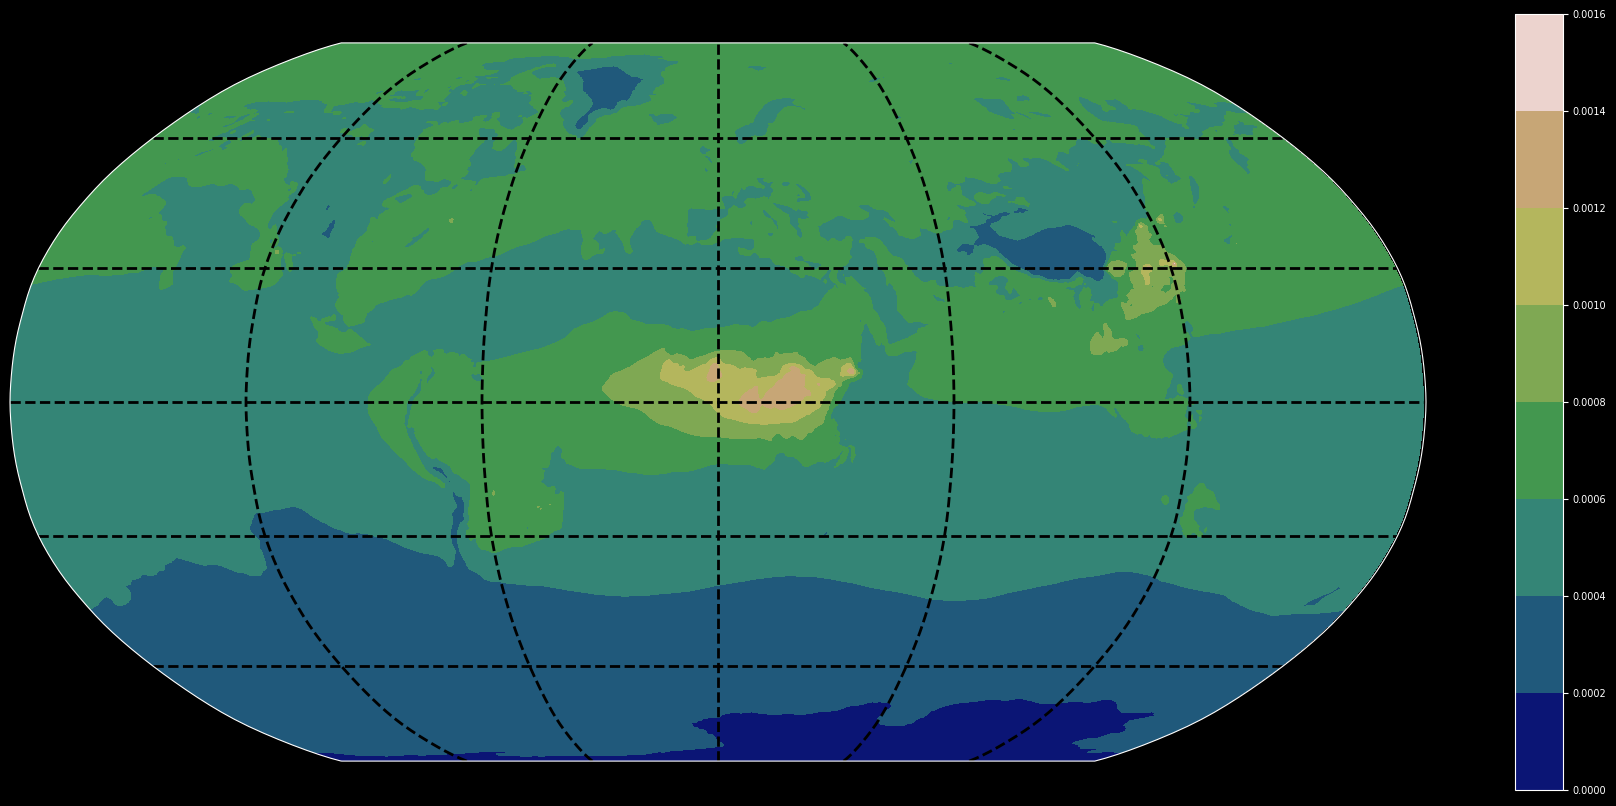

In [25]:
figure = plt.figure(figsize=(18,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='black',linewidth=2)

plt.contourf(DATA_LONG, DATA_LAT, DATA_COCL, transform=ccrs.PlateCarree(),cmap="gist_earth")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
color_bar_func.ax.tick_params(labelsize=7)

plt.tight_layout()
plt.show()

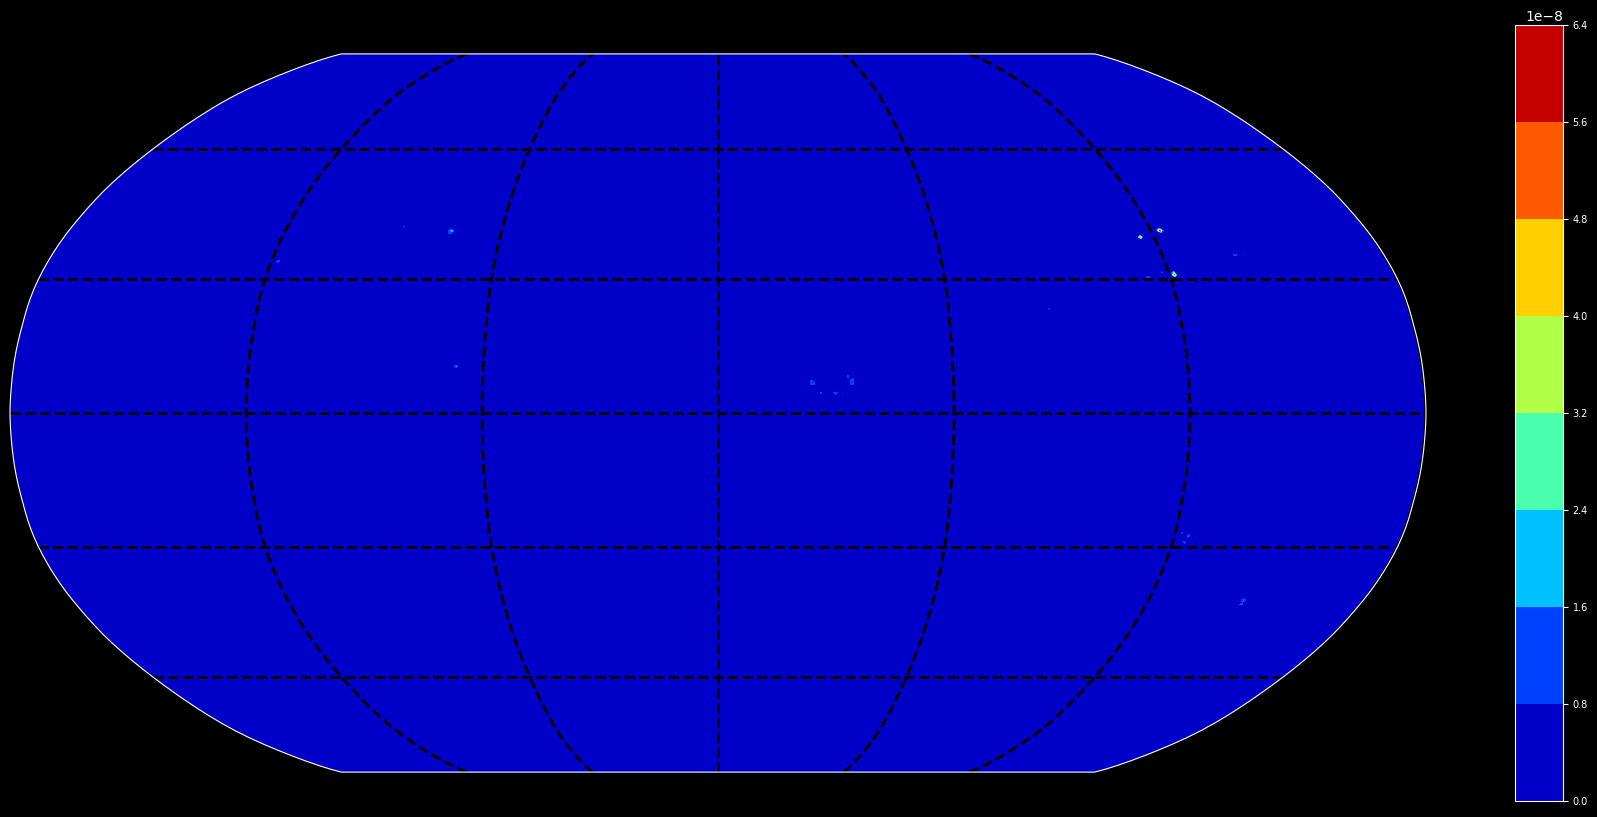

In [31]:
figure = plt.figure(figsize=(18,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='black',linewidth=2)

plt.contourf(DATA_LONG, DATA_LAT, DATA_COEM, transform=ccrs.PlateCarree(),cmap="jet")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical", aspect=16, shrink=0.8)
color_bar_func.ax.tick_params(labelsize=7)

plt.tight_layout()
plt.show()

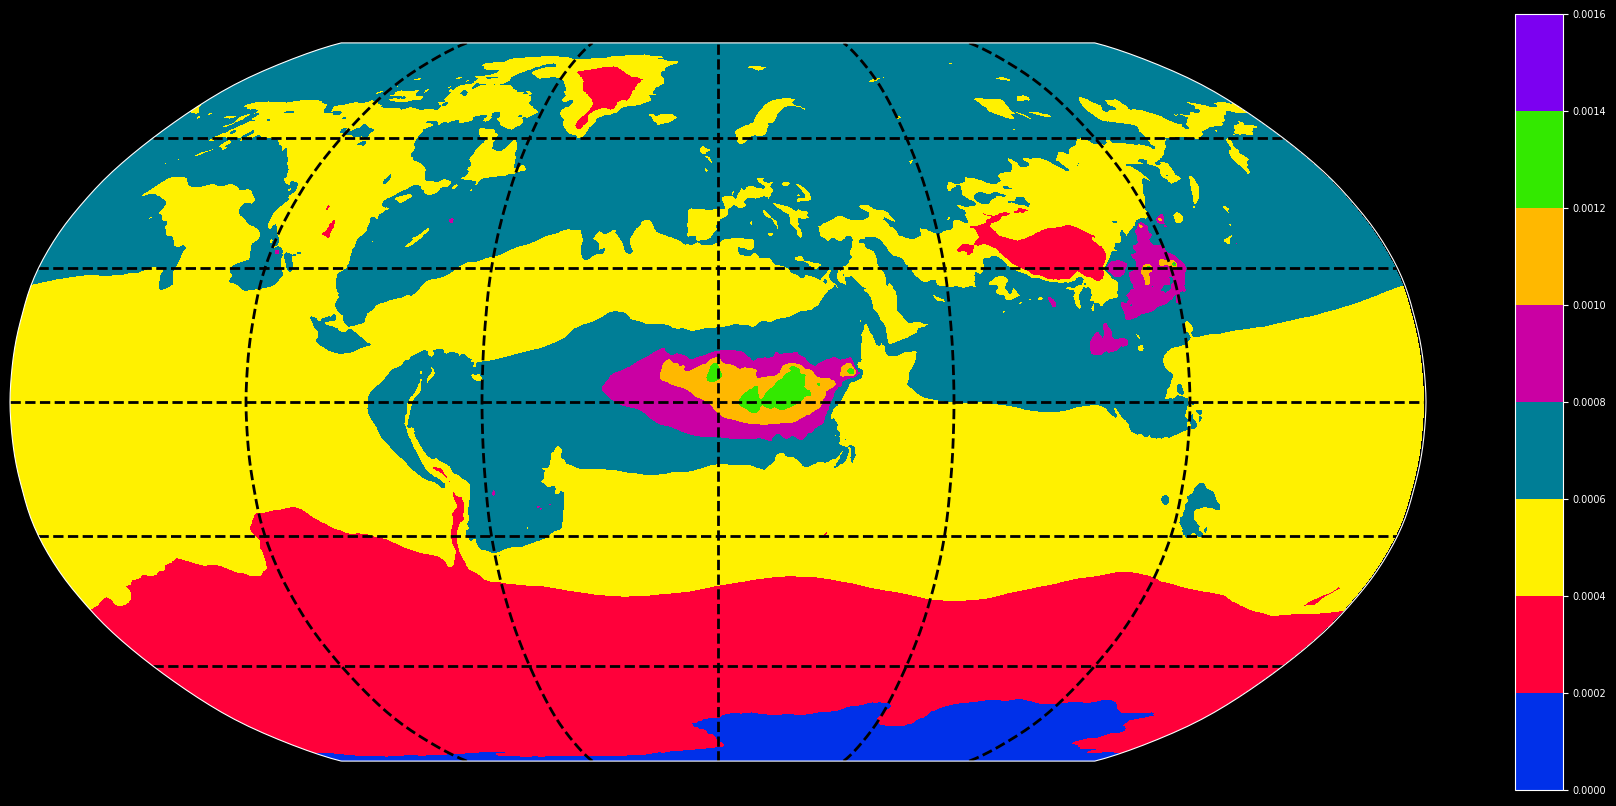

In [34]:


figure = plt.figure(figsize=(18,10))

axis_func = plt.axes(projection=ccrs.Robinson())
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='black',linewidth=2)

plt.contourf(DATA_LONG, DATA_LAT, DATA_COCL, transform=ccrs.PlateCarree(),cmap="prism")
color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical", aspect=16, shrink=0.8)
color_bar_func.ax.tick_params(labelsize=7)

plt.tight_layout()
plt.show()

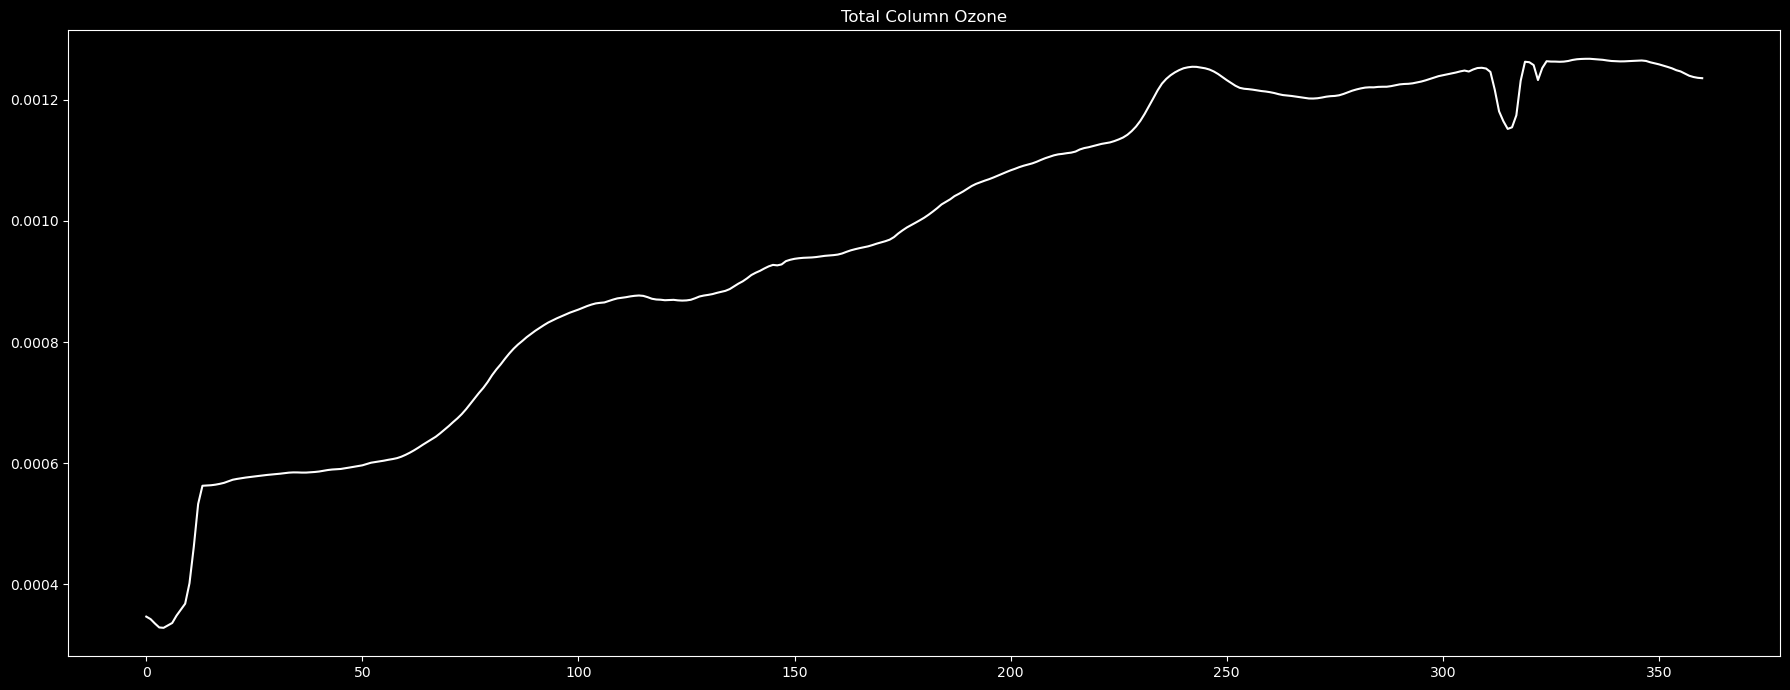

In [35]:
plt.figure(figsize=(18,7))
plt.title("Total Column Ozone")
plt.plot(MAIN_DATA["TO3_SUM"],color="white")
plt.tight_layout()
plt.show()

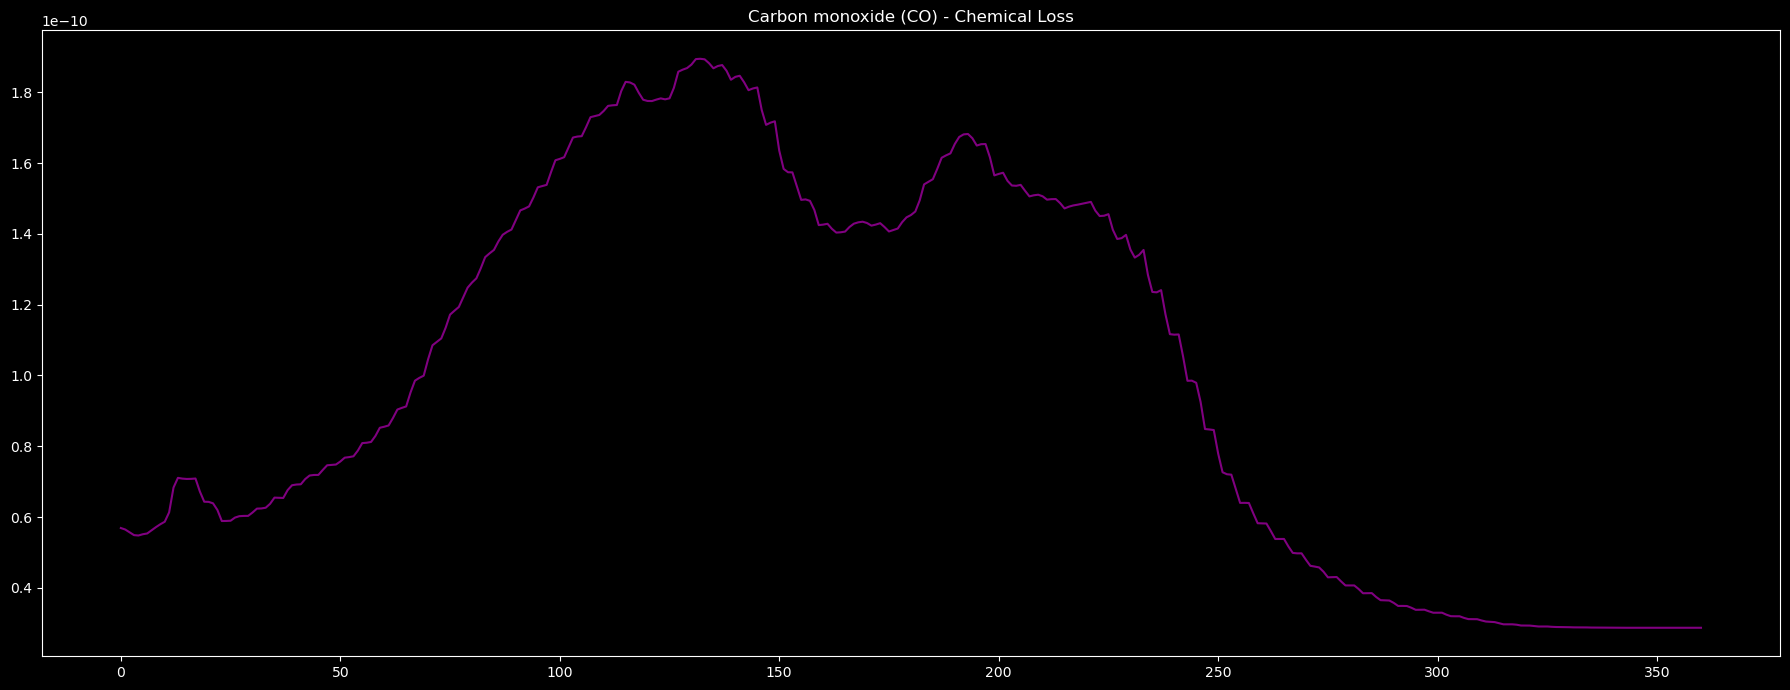

In [36]:
plt.figure(figsize=(18,7))
plt.title("Carbon monoxide (CO) - Chemical Loss")
plt.plot(MAIN_DATA["COLS_SUM"],color="purple")
plt.tight_layout()
plt.show()

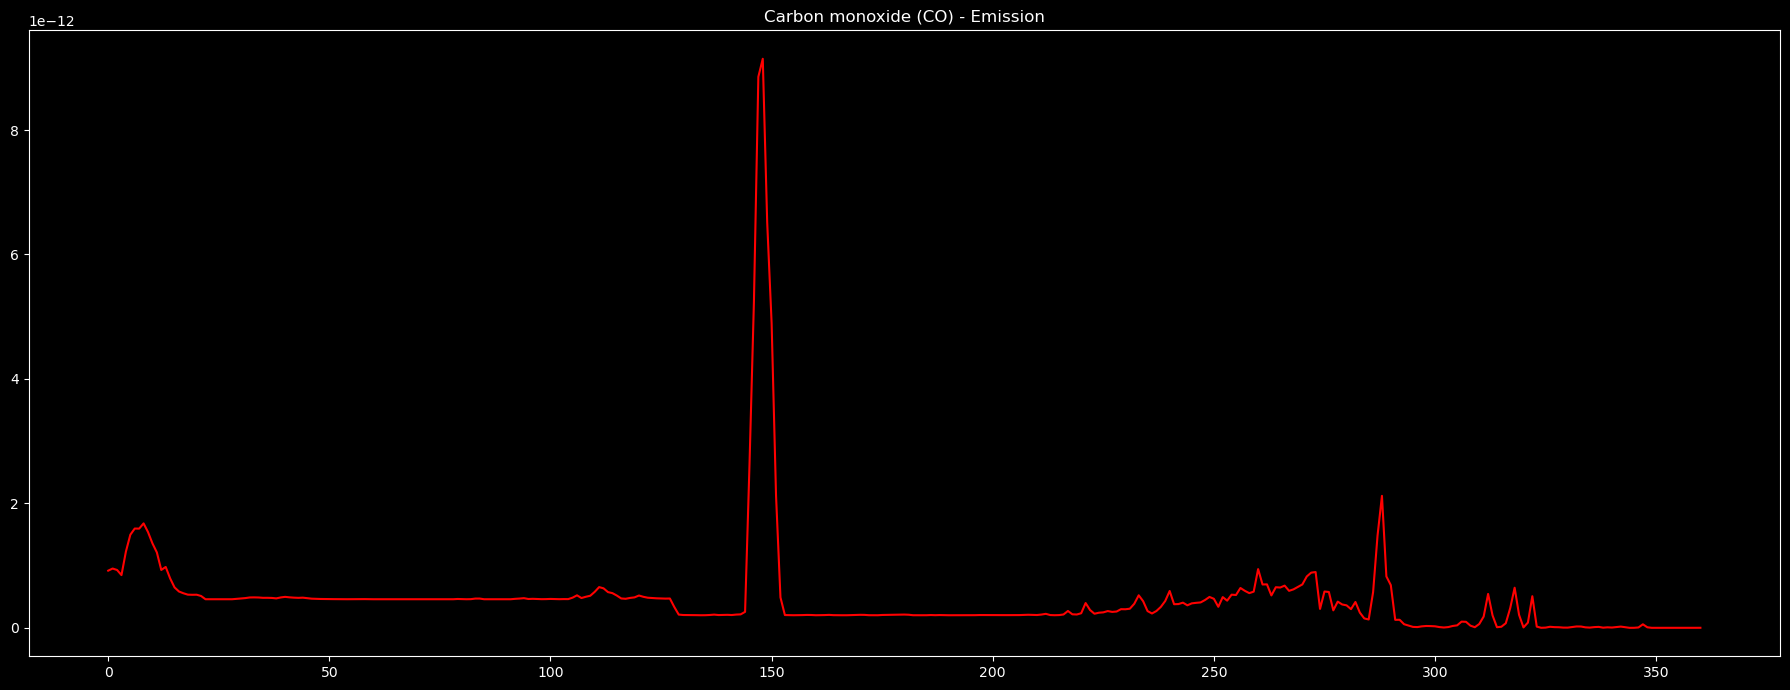

In [37]:
plt.figure(figsize=(18,7))
plt.title("Carbon monoxide (CO) - Emission")
plt.plot(MAIN_DATA["COEM_SUM"],color="red")
plt.tight_layout()
plt.show()

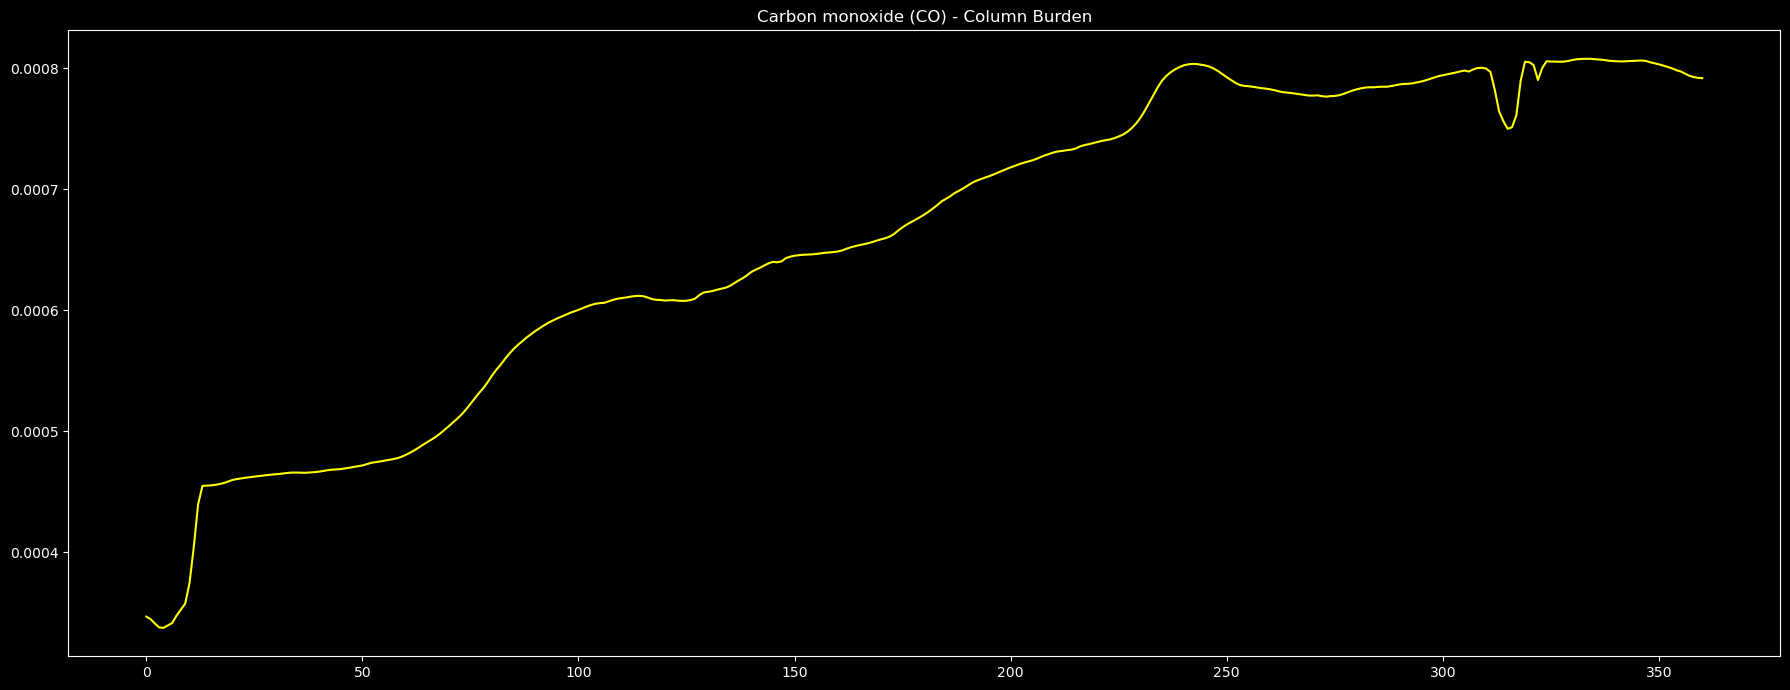

In [38]:
plt.figure(figsize=(18,7))
plt.title("Carbon monoxide (CO) - Column Burden")
plt.plot(MAIN_DATA["COCL_SUM"],color="yellow")
plt.tight_layout()
plt.show()

In [39]:
print(MAIN_DATA[MAIN_DATA["COCL_SUM"] == MAIN_DATA["COCL_SUM"].max()])

     LATITUDE  LONGITUDE  COCL_LAT  COCL_LONG      COEM_LAT  COEM_LONG  \
334      77.0      28.75  0.000634   0.000174  7.768092e-15        0.0   

         COLS_LAT     COLS_LONG   TO3_LAT  TO3_LONG  COCL_SUM      COEM_SUM  \
334  1.954015e-13  2.859641e-11  0.000634  0.000634  0.000808  7.768092e-15   

         COLS_SUM   TO3_SUM  
334  2.879181e-11  0.001268  


In [40]:
MAP_FUNCTION = folium.Map(location=[38.9637,35.2433],
                  tiles='Stamen Terrain',
                  zoom_start=2.0)

folium.CircleMarker(
    location=[77.0,28.75],
    radius=20,
    popup="<b>MAX Carbon monoxide (CO) - Column Burden<b>",
    tooltip="Click me",
    color='#2F4F4F',
    fill=True,
    fill_color='red',
).add_to(MAP_FUNCTION)

MAP_FUNCTION

In [41]:
print(MAIN_DATA[MAIN_DATA["COEM_SUM"] == MAIN_DATA["COEM_SUM"].max()])

     LATITUDE  LONGITUDE  COCL_LAT  COCL_LONG      COEM_LAT     COEM_LONG  \
148     -16.0      -87.5  0.000467   0.000176  8.942524e-12  2.022647e-13   

         COLS_LAT     COLS_LONG   TO3_LAT  TO3_LONG  COCL_SUM      COEM_SUM  \
148  1.424509e-10  2.901004e-11  0.000467  0.000467  0.000643  9.144789e-12   

         COLS_SUM   TO3_SUM  
148  1.714609e-10  0.000934  


In [42]:
MAP_FUNCTION = folium.Map(location=[38.9637,35.2433],
                  tiles='Stamen Terrain',
                  zoom_start=2.0)

folium.CircleMarker(
    location=[-16.0,-87.5],
    radius=20,
    popup="<b>MAX Carbon monoxide (CO) - Emission<b>",
    tooltip="Click me",
    color='#2F4F4F',
    fill=True,
    fill_color='red',
).add_to(MAP_FUNCTION)

MAP_FUNCTION

In [43]:
print(MAIN_DATA[MAIN_DATA["COLS_SUM"] == MAIN_DATA["COLS_SUM"].max()])

     LATITUDE  LONGITUDE  COCL_LAT  COCL_LONG      COEM_LAT     COEM_LONG  \
132     -24.0      -97.5  0.000441   0.000176  8.959847e-16  2.022647e-13   

         COLS_LAT     COLS_LONG   TO3_LAT  TO3_LONG  COCL_SUM      COEM_SUM  \
132  1.605065e-10  2.901004e-11  0.000441  0.000441  0.000617  2.031607e-13   

         COLS_SUM   TO3_SUM  
132  1.895166e-10  0.000881  


In [44]:
MAP_FUNCTION = folium.Map(location=[38.9637,35.2433],
                  tiles='Stamen Terrain',
                  zoom_start=2.0)

folium.CircleMarker(
    location=[-24.0,-97.5],
    radius=20,
    popup="<b>MAX Carbon monoxide (CO) - Chemical Loss<b>",
    tooltip="Click me",
    color='#2F4F4F',
    fill=True,
    fill_color='red',
).add_to(MAP_FUNCTION)

MAP_FUNCTION

In [45]:
print(MAIN_DATA[MAIN_DATA["TO3_SUM"] == MAIN_DATA["TO3_SUM"].max()])

     LATITUDE  LONGITUDE  COCL_LAT  COCL_LONG      COEM_LAT  COEM_LONG  \
334      77.0      28.75  0.000634   0.000174  7.768092e-15        0.0   

         COLS_LAT     COLS_LONG   TO3_LAT  TO3_LONG  COCL_SUM      COEM_SUM  \
334  1.954015e-13  2.859641e-11  0.000634  0.000634  0.000808  7.768092e-15   

         COLS_SUM   TO3_SUM  
334  2.879181e-11  0.001268  


In [47]:
MAP_FUNCTION = folium.Map(location=[12.9624669,77.6381958],
                  tiles='Stamen Terrain',
                  zoom_start=2.0)

folium.CircleMarker(
    location=[77.0,28.75],
    radius=20,
    popup="<b>MAX Total Column Ozone<b>",
    tooltip="Click me",
    color='#2F4F4F',
    fill=True,
    fill_color='red',
).add_to(MAP_FUNCTION)

MAP_FUNCTION

In [48]:
MAP_FUNCTION = folium.Map(location=[38.9637,35.2433],
                  tiles='Stamen Terrain',
                  zoom_start=2.0)

folium.CircleMarker(
    location=[77.0,28.75],
    radius=20,
    popup="<b>MAX Total Column Ozone<b>",
    tooltip="Click me",
    color='#2F4F4F',
    fill=True,
    fill_color='red',
).add_to(MAP_FUNCTION)

MAP_FUNCTION

In [49]:
lons,lats= np.meshgrid(DATA_LONG,DATA_LAT)

Text(0.5, 1.0, 'Chemical Loss')

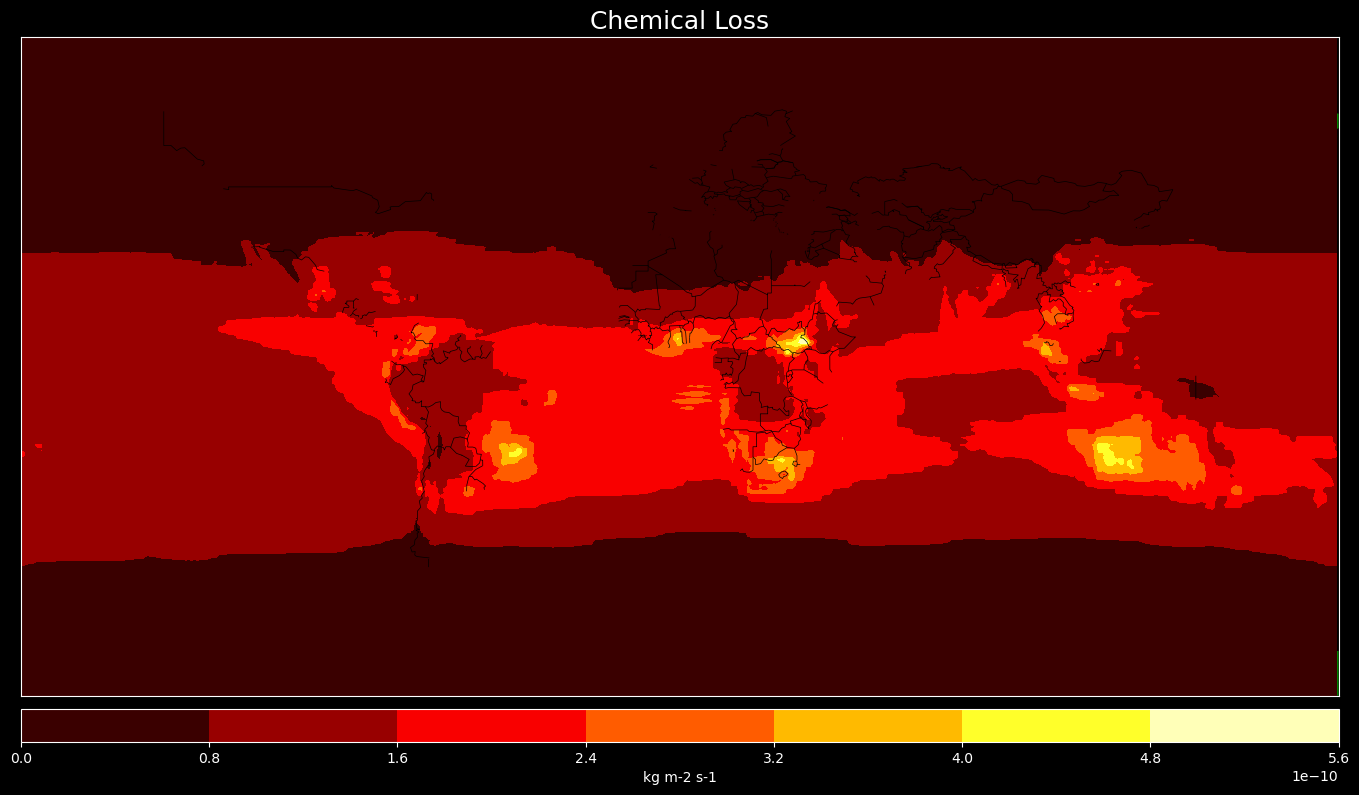

In [50]:
figure = plt.figure(figsize=(17,12))
Map_Plot = Basemap(projection='cyl',lon_0=0,resolution='c')
Map_Plot.drawcountries()
Map_Plot.fillcontinents(color='green',lake_color='aqua')
TEMP_FUNC = Map_Plot.contourf(lons, lats, DATA_COLS,cmap="hot")
COLOR_BAR_FUNC = Map_Plot.colorbar(TEMP_FUNC,"bottom", size="5%", pad="2%")
COLOR_BAR_FUNC.set_label('kg m-2 s-1')
plt.title("Chemical Loss", fontsize=18)

Text(0.5, 1.0, 'Column Burden')

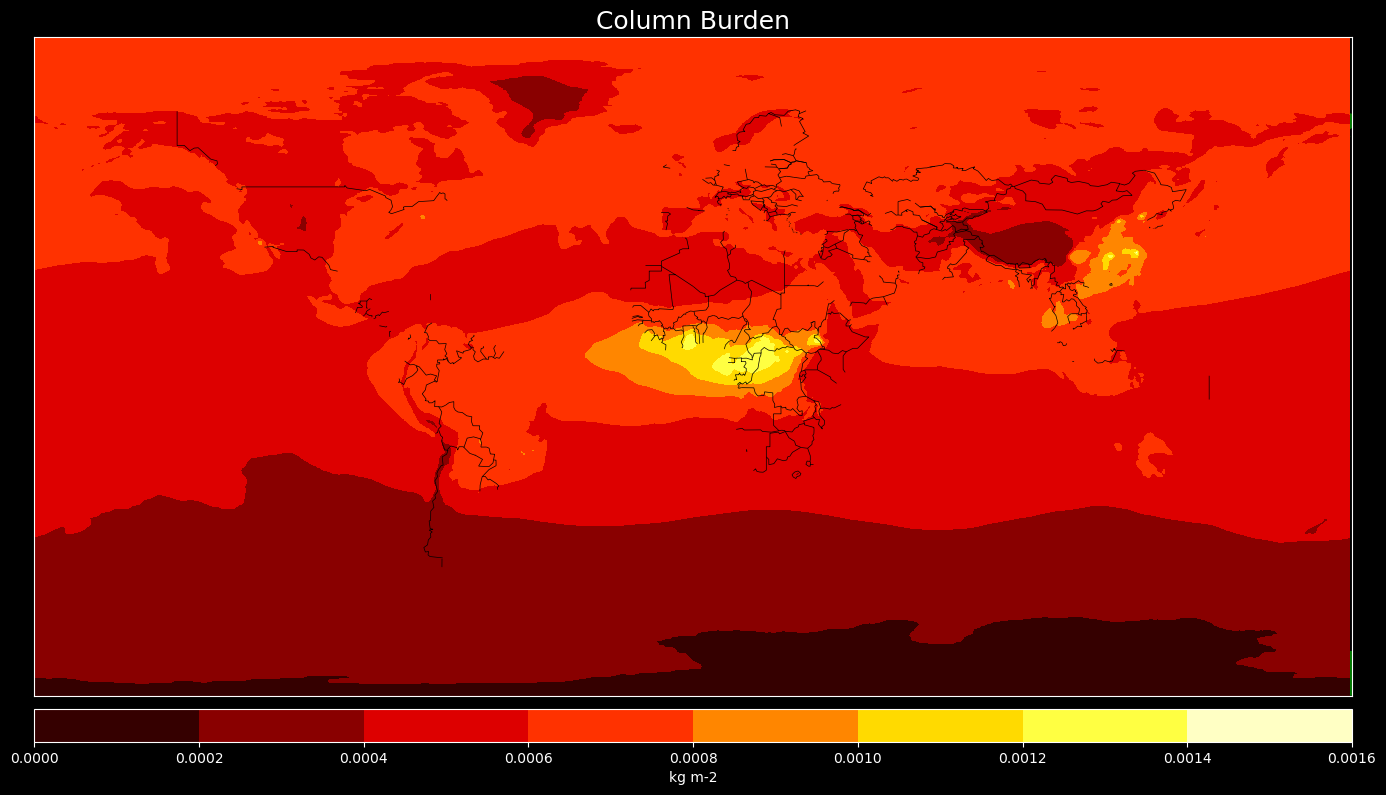

In [55]:
figure = plt.figure(figsize=(17,12))

Map_Plot = Basemap(projection='cyl',lon_0=0,resolution='c')

Map_Plot.drawcountries()
Map_Plot.fillcontinents(color='green',lake_color='aqua')
TEMP_FUNC = Map_Plot.contourf(lons, lats, DATA_COCL,cmap="hot")
COLOR_BAR_FUNC = Map_Plot.colorbar(TEMP_FUNC,"bottom", size="5%", pad="2%")
COLOR_BAR_FUNC.set_label('kg m-2')
plt.title("Column Burden", fontsize=18)

Text(0.5, 1.0, 'Column Burden')

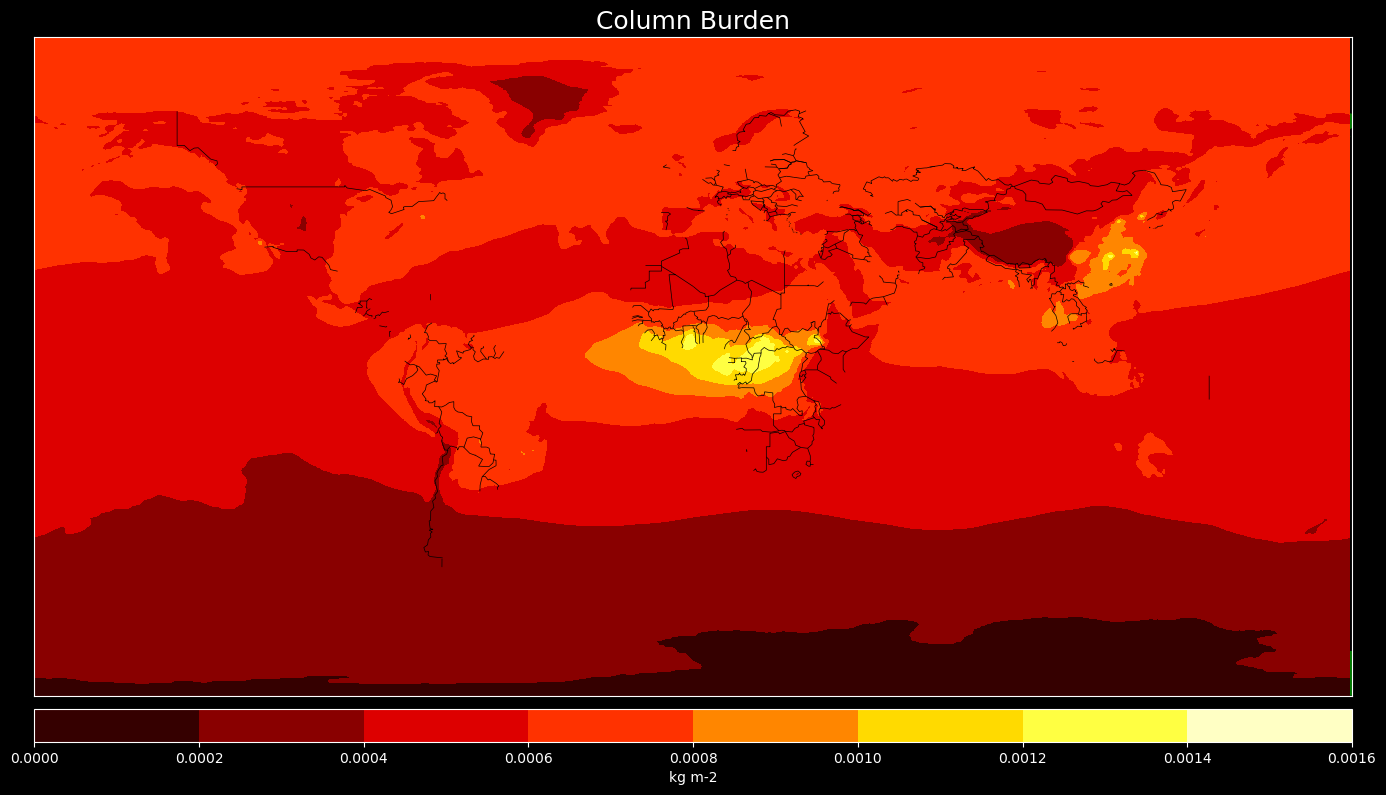

In [56]:
figure = plt.figure(figsize=(17,12))

Map_Plot = Basemap(projection='cyl',lon_0=0,resolution='c')

Map_Plot.drawcountries()
Map_Plot.fillcontinents(color='green',lake_color='aqua')
TEMP_FUNC = Map_Plot.contourf(lons, lats, DATA_COCL,cmap="hot")
COLOR_BAR_FUNC = Map_Plot.colorbar(TEMP_FUNC,"bottom", size="5%", pad="2%")
COLOR_BAR_FUNC.set_label('kg m-2')
plt.title("Column Burden", fontsize=18)

Text(0.5, 1.0, 'Column Burden')

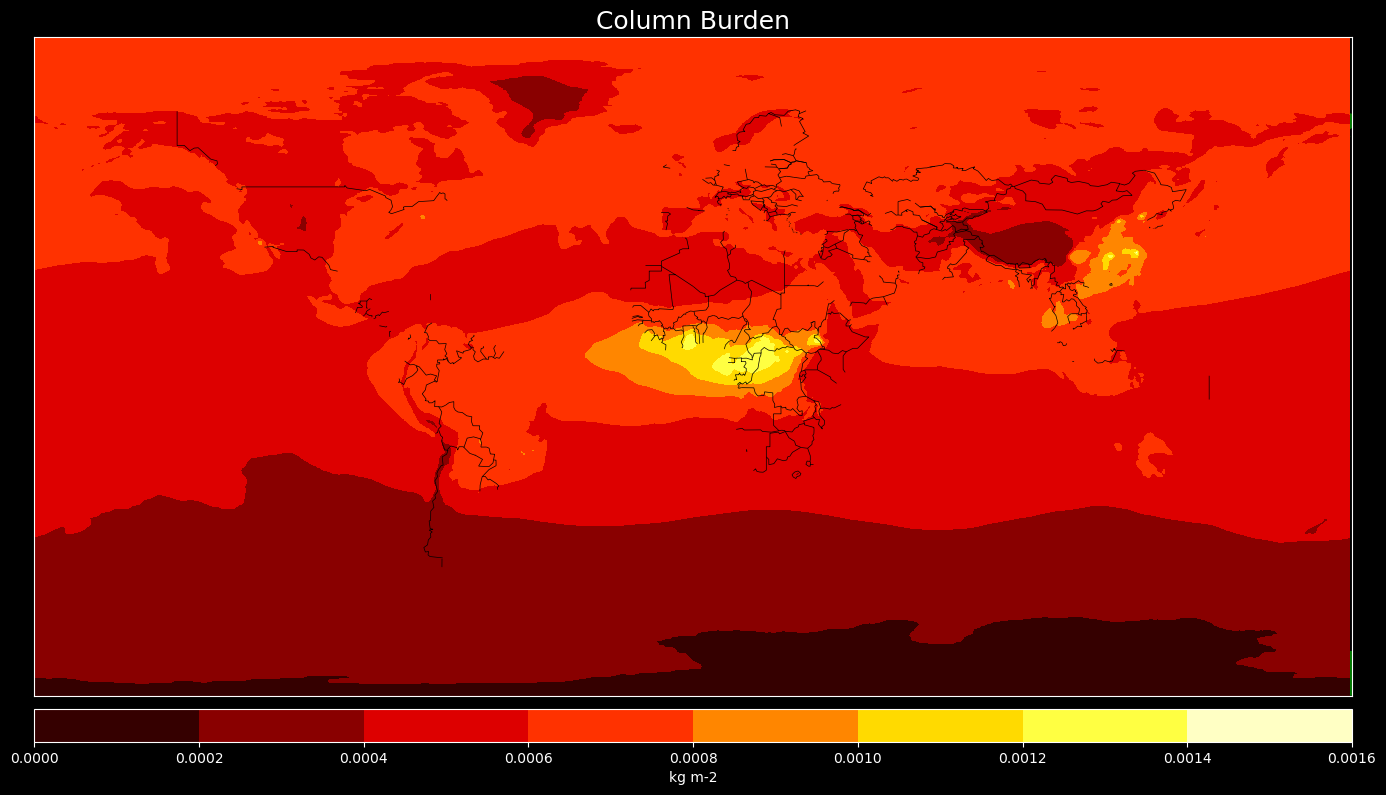

In [57]:
figure = plt.figure(figsize=(17,12))

Map_Plot = Basemap(projection='cyl',lon_0=0,resolution='c')

Map_Plot.drawcountries()
Map_Plot.fillcontinents(color='green',lake_color='aqua')
TEMP_FUNC = Map_Plot.contourf(lons, lats, DATA_COCL,cmap="hot")
COLOR_BAR_FUNC = Map_Plot.colorbar(TEMP_FUNC,"bottom", size="5%", pad="2%")
COLOR_BAR_FUNC.set_label('kg m-2')
plt.title("Column Burden", fontsize=18)

Text(0.5, 1.0, 'EMISSION')

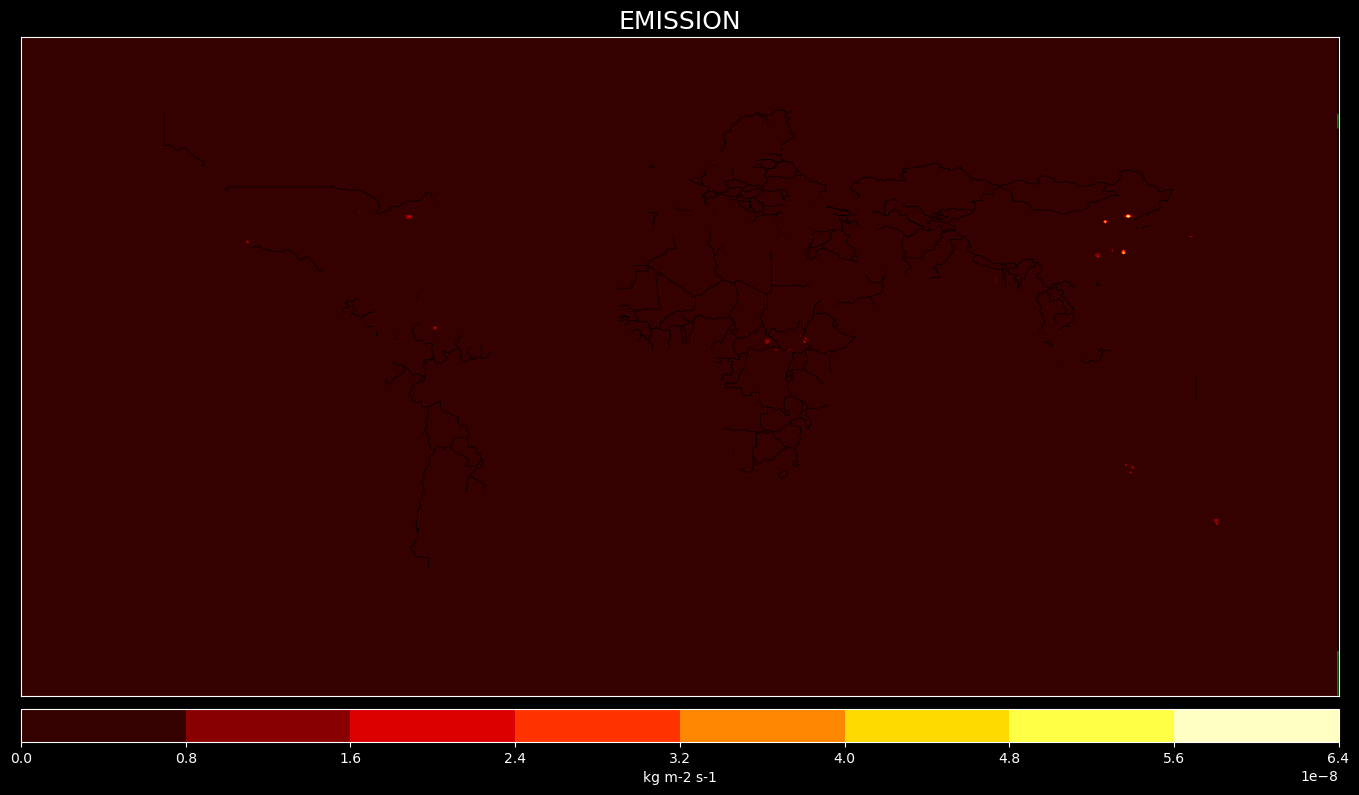

In [58]:
figure = plt.figure(figsize=(17,12))
Map_Plot = Basemap(projection='cyl',lon_0=0,resolution='c')
Map_Plot.drawcountries()
Map_Plot.fillcontinents(color='green',lake_color='aqua')
TEMP_FUNC = Map_Plot.contourf(lons, lats, DATA_COEM,cmap="hot")
COLOR_BAR_FUNC = Map_Plot.colorbar(TEMP_FUNC,"bottom", size="5%", pad="2%")
COLOR_BAR_FUNC.set_label('kg m-2 s-1')
plt.title("EMISSION", fontsize=18)

Text(0.5, 1.0, 'TOTAL COLUMN OZONE')

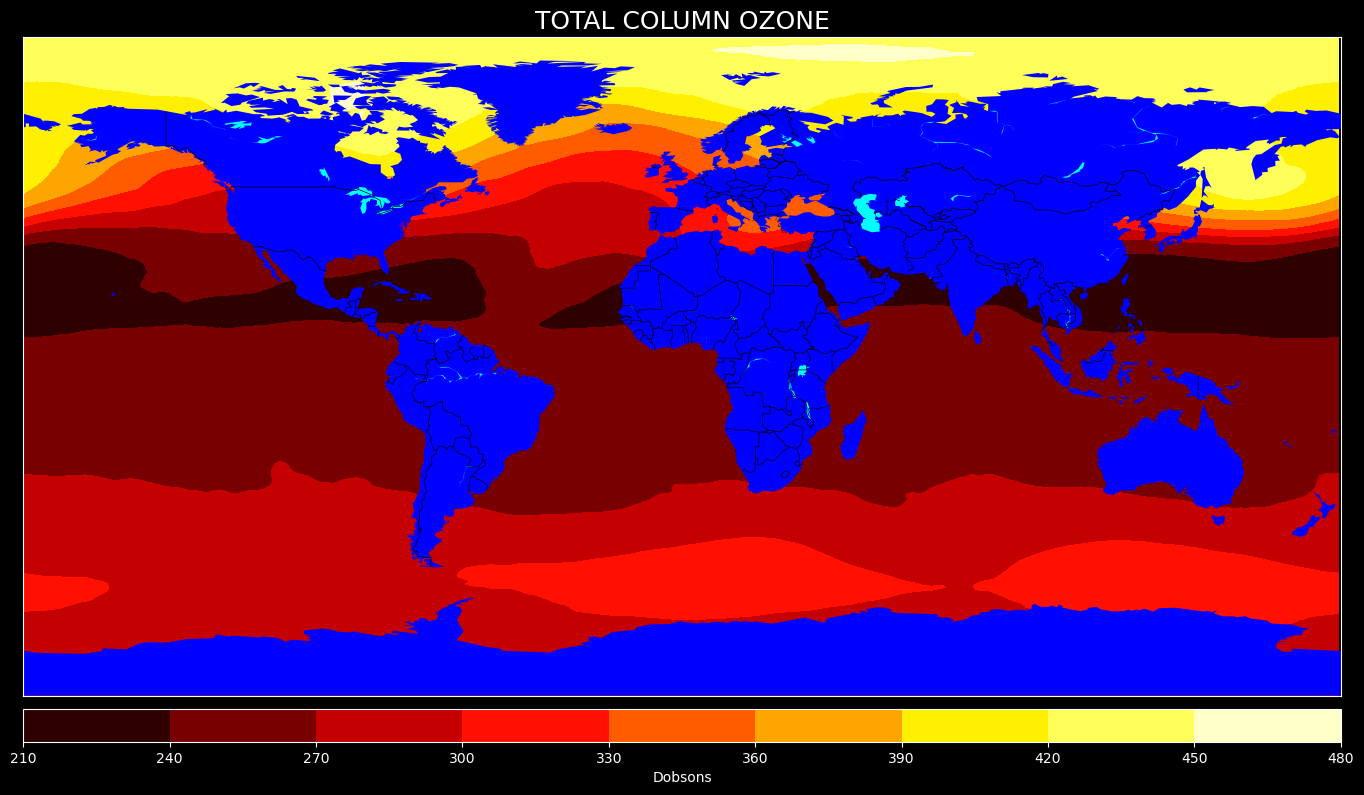

In [60]:
figure = plt.figure(figsize=(17,12))
Map_Plot = Basemap(projection='cyl',lon_0=0,resolution='c')
Map_Plot.drawcountries()

TEMP_FUNC = Map_Plot.contourf(lons, lats, DATA_TO3,cmap="hot")
Map_Plot.fillcontinents(color='blue',lake_color='aqua')
COLOR_BAR_FUNC = Map_Plot.colorbar(TEMP_FUNC,"bottom", size="5%", pad="2%")
COLOR_BAR_FUNC.set_label('Dobsons')
plt.title("TOTAL COLUMN OZONE", fontsize=18)

In [61]:
MAIN_LAT_LONG = MAIN_DATA[["LATITUDE","LONGITUDE"]]

HEAT_MAIN = list(zip(MAIN_LAT_LONG.LATITUDE,MAIN_LAT_LONG.LONGITUDE))

In [62]:
MAP_FUNCTION = folium.Map(tiles='Stamen Terrain')

plugins.HeatMap(HEAT_MAIN).add_to(MAP_FUNCTION)

MAP_FUNCTION